<a href="https://colab.research.google.com/github/AbernalV/SyS/blob/main/ALEJANDROBV_PARCIAL_03_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUNTO 1

### Ecuación diferencial

La ecuación diferencia del sistema mecánico se obtiene al considerar el equilibrio de fuerzas ejercidas sobre la masa:

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Es común modelar la fuerza de fricción $F_\text{F}(t)$ inducida por el amortiguador de manera proporcional a la velocidad de la masa

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

La fuerza inercial $F_\text{I}(t)$ debida a la aceleración de la masa se da como

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Al introducir las fuerzas anteriormente halladas en el equilibrio de fuerzas se obtiene la ecuación diferencial que describe el desplazamiento del péndulo elástico amortiguado

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Como consecuencia de la fuerza externa.

La ecuación anterior constituye una EDO con coeficientes constantes. Puede interpretarse como un SLTI con la fuerza externa $x(t)=F_\text{E}(t)$ como señal de entrada y el desplazamiento de la masa como la señal de salida $y(t)$.

### Equivalente RCL

Comparando las EDO del péndulo elástico amortiguado y el circuito RLC, se tiene que ambos constituyen una EDO de segundo orden con coeficientes constantes.

La división de la EDO del circuito por la constante $C$ resulta en:

\begin{equation}
L \frac{d^2 u_\text{o}(t)}{dt^2} + R \frac{d u_\text{o}(t)}{dt} + \frac{1}{C} u_\text{o}(t) = \frac{1}{C} u_\text{i}(t)
\end{equation}

Donde $u_\text{i}(t)$ y $u_\text{o}(t)$ denotan el voltaje de entrada y salida del circuito respesctivamente.

La comparación de la EDO anterior con la del péndulo elástico amortiguado produce así:

|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
| Señal de entrada $x(t)$ | $u_\text{i}(t) = F_\text{E}(t) C$  | $F_\text{E}(t) = \frac{u_\text{i}(t)}{C}$ |
| Señal de salida $y(t)$  | $u_\text{o}(t)$                    | $y(t)$                                    |
|                         | $L=m$                              | $m=L$                                     |
|                         | $R=c$                              | $c=R$                                     |
|                         | $C=\frac{1}{k}$                    | $k=\frac{1}{C}$                           |

Se tiene la función de transferencia como:

###Función de Transferencia desde la Entrada de Tensión hasta la Tensión en el Capacitor

##Impedancias del Circuito

Dado un circuito RLC en serie:

   La impedancia del inductor es $Z_L(s) = Ls$.
   La impedancia de la resistencia es $Z_R = R$.
   La impedancia del capacitor es $Z_C(s) = \frac{1}{Cs}$.


La impedancia total del circuito es la suma de las tres:
\begin{equation}
Z_{\text{total}}(s) = Z_R + Z_L(s) + Z_C(s) = R + Ls + \frac{1}{Cs}
\end{equation}

###Relación de Tensiones

Utilizando la división de voltaje, la relación entre la tensión del capacitor $V_C(s)$ y la tensión de entrada $V_{in}(s)$ es:

\begin{equation}
V_C(s) = V_{in}(s) \cdot \frac{Z_C(s)}{Z_{\text{total}}(s)}
\end{equation}

Sustituyendo las impedancias:

\begin{equation}
V_C(s) = V_{in}(s) \cdot \frac{\frac{1}{Cs}}{R + Ls + \frac{1}{Cs}}
\end{equation}

###Función de Transferencia

La función de transferencia $H(s) = \frac{V_C(s)}{V_{in}(s)}$ es:

\begin{equation}
H(s) = \frac{\frac{1}{Cs}}{R + Ls + \frac{1}{Cs}}
\end{equation}

Multiplicamos el numerador y el denominador por $Cs$ para simplificar:

\begin{equation}
H(s) = \frac{1}{Cs\left( R + Ls + \frac{1}{Cs} \right)} = \frac{1}{LCs^2 + RCs + 1}
\end{equation}


###Simulación:

In [ ]:
!pip install numpy matplotlib control ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 3.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

# Función para crear el sistema de segundo orden en función de m, c, k
def sistema_amortiguado(m, zeta, wn):
    """
    Función que genera el sistema de segundo orden dado m (masa), zeta (factor de amortiguamiento), y wn (frecuencia natural).
    """
    # Calcular k y c
    k = m * wn**2  # Constante del resorte
    c = 2 * zeta * np.sqrt(k * m)  # Coeficiente de amortiguamiento

    # Crear la función de transferencia
    num = [1]  # Numerador
    den = [m, c, k]  # Denominador basado en la ecuación de segundo orden m s^2 + c s + k

    G = ctl.TransferFunction(num, den)
    return G, c, k

# Función para simular y graficar
def simular_sistema(m, zeta, wn=1):
    """
    Simula y grafica las respuestas de un sistema amortiguado de segundo orden dado el valor de m (masa), zeta y wn (frecuencia natural).
    """
    # Obtener la función de transferencia y valores de c, k
    G, c, k = sistema_amortiguado(m, zeta, wn)

    print(f"Constante de amortiguamiento (c): {c}")
    print(f"Constante del resorte (k): {k}")

    # 1. Polos y ceros
    plt.figure()
    ctl.pzmap(G, title="Diagrama de Polos y Ceros")
    plt.grid(True)

    # 2. Diagrama de Bode
    plt.figure()
    ctl.bode_plot(G)

    # 3. Respuesta al impulso
    plt.figure()
    t, y_imp = ctl.impulse_response(G)
    plt.plot(t, y_imp)
    plt.title('Respuesta al Impulso')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    # 4. Respuesta al escalón
    plt.figure()
    t, y_step = ctl.step_response(G)
    plt.plot(t, y_step)
    plt.title('Respuesta al Escalón')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.show()

# Interfaz interactiva para seleccionar el valor de m, zeta y wn
interact(simular_sistema,
         m=FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Masa (m)'),
         zeta=FloatSlider(value=0.5, min=0, max=2, step=0.1, description='Factor de amortiguamiento'),
         wn=FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Frecuencia natural (wn)'));


interactive(children=(FloatSlider(value=1.0, description='Masa (m)', max=10.0, min=0.1), FloatSlider(value=0.5…

###PUNTO 2

In [ ]:
!pip install streamlit -q #instalación de librerías
!npm install localtunnel
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.6 MB/s eta 0:00:00

added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached request

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "13onos9TGog6AIX0hY76Md1GJqbT9DyP1"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O songs1.xlsx && rm -rf /tmp/cookies.txt
!unzip -o codigos.zip
!dir

--2024-10-02 03:21:54--  https://docs.google.com/uc?export=download&confirm=&id=13onos9TGog6AIX0hY76Md1GJqbT9DyP1
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.113, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=13onos9TGog6AIX0hY76Md1GJqbT9DyP1&export=download [following]
--2024-10-02 03:21:55--  https://drive.usercontent.google.com/download?id=13onos9TGog6AIX0hY76Md1GJqbT9DyP1&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9094 (8.9K) [application/octet-stream]
Saving to: ‘songs1.xlsx’

songs1.xlsx         100%[===================>]   8.88K  --.-KB/s    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'songs1.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

type_num   Genero                Banda  \
0          1  Clasica               Mozart   
1          1  Clasica             Paganini   
2          1  Clasica          Tchaikovsky   
3          1  Clasica    Pablo de Sarasete   
4          1  Clasica       Vittorio Monti   
5          1  Clasica              Bazzini   
6          1  Clasica                Bizet   
7          1  Clasica     Luigi Boccherini   
8          2    Metal             Megadeth   
9          2    Metal             Dethklok   
10         2    Metal                Death   
11         2    Metal      Cannibal Corpse   
12         2    Metal             Dethklok   
13         2    Metal               Gojira   
14         2    Metal             Mastodon   
15         2    Metal  Maximum the hormone   

                                        Cancion  
0   https://www.youtube.com/watch?v=l45DAuXYSIs  
1   https://www.youtube.com/watch?v=6ruHDWSNvB8  
2   https://www.youtube.com/watch?v=do6Ki6kMq_o  
3   https://www.youtube.com/watch?v=tIkt1K-Rvpc  
4   https://www.youtube.com/watch?v=mN1WJ-KfxFU  
5   https://www.youtube.com/watch?v=NAuZM8hgq_I  
6   https://www.youtube.com/watch?v=2y09pD1r-Qs  
7   https://www.youtube.com/watch?v=2AZOknKotVc  
8   https://www.youtube.com/watch?v=kfTcE89sBXU  
9   https://www.youtube.com/watch?v=Yl7TdNdTmpU  
10  https://www.youtube.com/watch?v=TC7PKKKglfg  
11  https://www.youtube.com/watch?v=vlgiWBCbCJk  
12  https://www.youtube.com/watch?v=V-OKSpI9Jh4  
13  https://www.youtube.com/watch?v=Q2pCt6mnMWE  
14  https://www.youtube.com/watch?v=6aTTvP4GF-c  
15  https://www.youtube.com/watch?v=_zwV6YaSF5s

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached mutagen-1.47.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached pycryptodomex-3.20.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached websockets-13.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Usi

In [ ]:
#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import subprocess

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'Cancion']}\n")
    print(f"band: {X.loc[n,'Banda']}\n")
    print(f"type: {X.loc[n,'Genero']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'Banda']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'Cancion'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 16
link: https://www.youtube.com/watch?v=l45DAuXYSIs

band: Mozart

type: Clasica

[youtube] Extracting URL: https://www.youtube.com/watch?v=l45DAuXYSIs
[youtube] l45DAuXYSIs: Downloading webpage
[youtube] l45DAuXYSIs: Downloading ios player API JSON
[youtube] l45DAuXYSIs: Downloading web creator player API JSON
[youtube] l45DAuXYSIs: Downloading player bbc52cb2
[youtube] l45DAuXYSIs: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=l45DAuXYSIs
[youtube] l45DAuXYSIs: Downloading webpage
[youtube] l45DAuXYSIs: Downloading ios player API JSON
[youtube] l45DAuXYSIs: Downloading web creator player API JSON
[youtube] l45DAuXYSIs: Downloading player d9418494
[youtube] l45DAuXYSIs: Downloading m3u8 information
[info] l45DAuXYSIs: Downloading 1 format(s): 251
[download] Destination: results/Mozart_0_1.mp3
[download] 100% of    6.35MiB in 00:00:00 at 11.72MiB/s  
Download complete... results/Mozart_0_1.mp3
video 2 de 16
link: https://www.youtube.

In [ ]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Dethklok_9_2.wav',
 'Mastodon_14_2.wav',
 'Gojira_13_2.wav',
 'Paganini_1_1.wav',
 'Vittorio Monti_4_1.wav',
 'Megadeth_8_2.wav',
 'Cannibal Corpse_11_2.wav',
 'Tchaikovsky_2_1.wav',
 'Mozart_0_1.wav',
 'Death_10_2.wav',
 'Bizet_6_1.wav',
 'Luigi Boccherini_7_1.wav',
 'Maximum the hormone_15_2.wav',
 'Dethklok_12_2.wav',
 'Pablo de Sarasete_3_1.wav',
 'Bazzini_5_1.wav']

In [ ]:
!pip install soundfile #instalar sondfile

In [ ]:

import librosa

# Carga el archivo de audio
audio_path = '/content/results/Bazzini_5_1.wav'  # Especifica la ruta a tu archivo de audio
audio_data, sample_rate = librosa.load(audio_path, sr=None)  # sr=None preserva la frecuencia de muestreo original

# Muestra la frecuencia de muestreo
print(f'Frecuencia de muestreo: {sample_rate} Hz')

Frecuencia de muestreo: 48000 Hz


In [ ]:

import soundfile as sf
import numpy as np

# leer archivos y crear np.array audios
fs = 48000
tl = np.array([40, 50, 60, 70, 80, 90, 100])  # puntos de lectura
ts = 4  # tiempo por segmento en segundos
Ns = len(wav_files) * len(tl)  # cantidad de segmentos
x_t = np.zeros((Ns, int(ts * fs)))  # Ns segmentos, cantidad de muestras (ahora en mono)
label = np.zeros((Ns, 1))  # vector para tipo de género
name_c = []

# leer archivos wav
i = 0
for name in wav_files:  # lectura de audios .wav
    x, fs = sf.read(path + name)  # leer el archivo de audio

    # Verificar si es estéreo
    if x.ndim == 2:  # si tiene 2 dimensiones (es decir, estéreo)
        # Convertir a mono promediando los canales
        x = np.mean(x, axis=1)

    for ti in tl:  # segmentos de tiempo
        x_t[i] = x[int(fs * ti):int(fs * (ti + ts))]  # almacenar el segmento
        label[i] = int(name[-5])  # tipo de género
        name_c += [name[:-6]]  # guardar el nombre sin la extensión
        print(f"{i} lectura: {name}; segundo {ti}:{ti + ts}; tipo música {label[i]}")
        i += 1

# Verificar el tamaño de la matriz
x_t.shape

0 lectura: Dethklok_9_2.wav; segundo 40:44; tipo música [2.]
1 lectura: Dethklok_9_2.wav; segundo 50:54; tipo música [2.]
2 lectura: Dethklok_9_2.wav; segundo 60:64; tipo música [2.]
3 lectura: Dethklok_9_2.wav; segundo 70:74; tipo música [2.]
4 lectura: Dethklok_9_2.wav; segundo 80:84; tipo música [2.]
5 lectura: Dethklok_9_2.wav; segundo 90:94; tipo música [2.]
6 lectura: Dethklok_9_2.wav; segundo 100:104; tipo música [2.]
7 lectura: Mastodon_14_2.wav; segundo 40:44; tipo música [2.]
8 lectura: Mastodon_14_2.wav; segundo 50:54; tipo música [2.]
9 lectura: Mastodon_14_2.wav; segundo 60:64; tipo música [2.]
10 lectura: Mastodon_14_2.wav; segundo 70:74; tipo música [2.]
11 lectura: Mastodon_14_2.wav; segundo 80:84; tipo música [2.]
12 lectura: Mastodon_14_2.wav; segundo 90:94; tipo música [2.]
13 lectura: Mastodon_14_2.wav; segundo 100:104; tipo música [2.]
14 lectura: Gojira_13_2.wav; segundo 40:44; tipo música [2.]
15 lectura: Gojira_13_2.wav; segundo 50:54; tipo música [2.]
16 lectur

(112, 192000)

In [ ]:
from IPython.display import Audio #reproducir segmento
i = 3
Audio(x_t[i].T,rate=fs)

In [ ]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(112,)

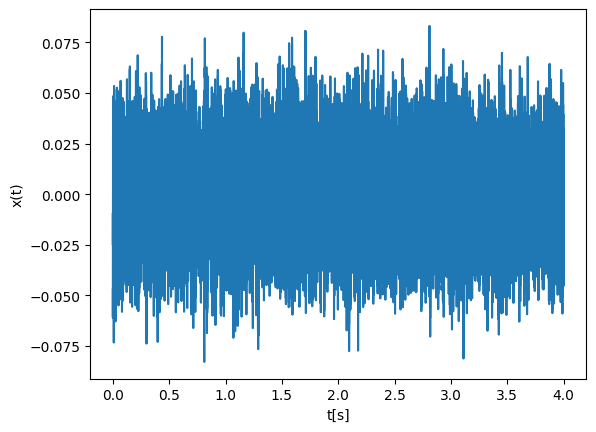

In [ ]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-0).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()


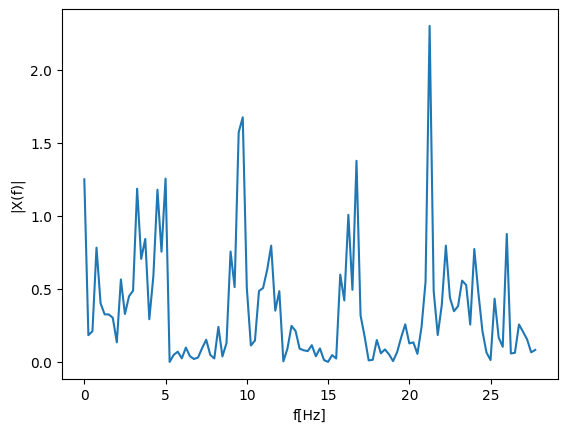

In [ ]:
#grafica tiempo y fourier
plt.plot(vf[:len(Xw)],abs(Xw)) # se ajusta vf al tamaño de Xw
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()


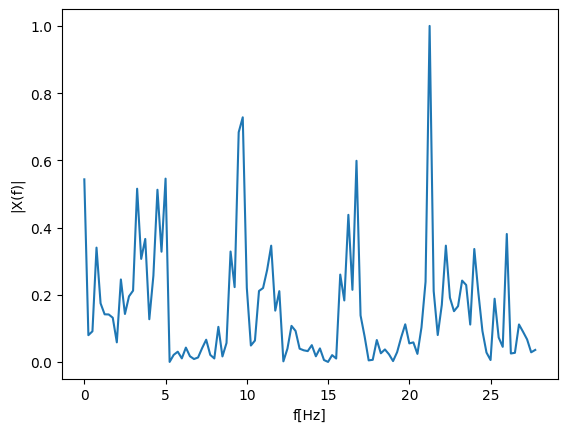

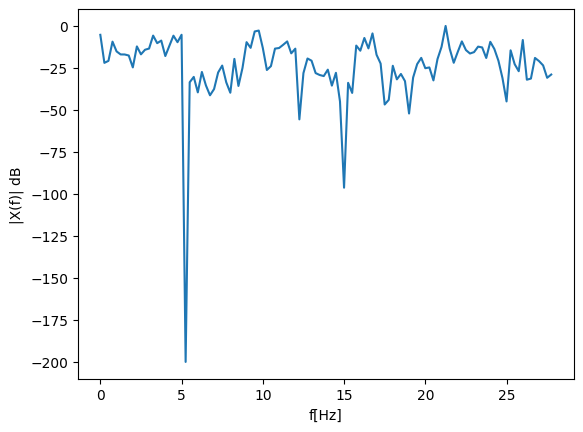

In [ ]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).reshape(-1,1)).T

plt.plot(vf[:Xw_.shape[1]],Xw_.T) # se ajusta vf al tamaño de Xw_
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf[:Xw_.shape[1]],(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log y se ajusta vf al tamaño de Xw_
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='random')
#red_ = PCA(n_components=2,random_state=123)
fmax = 70000
X_2D = red_.fit_transform(Xw_[:,:fmax].T) #se tiene en cuenta el espectro hasta fmax Hz

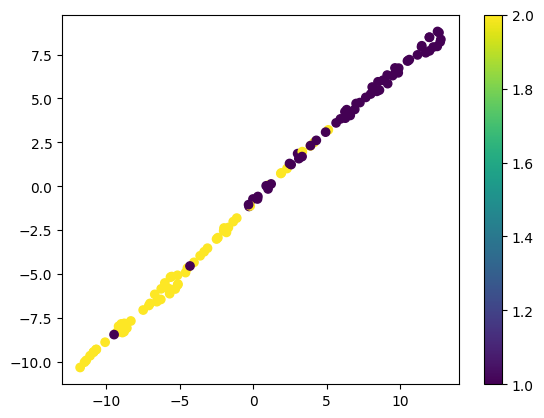

<ipython-input-21-6e94555dcd77>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


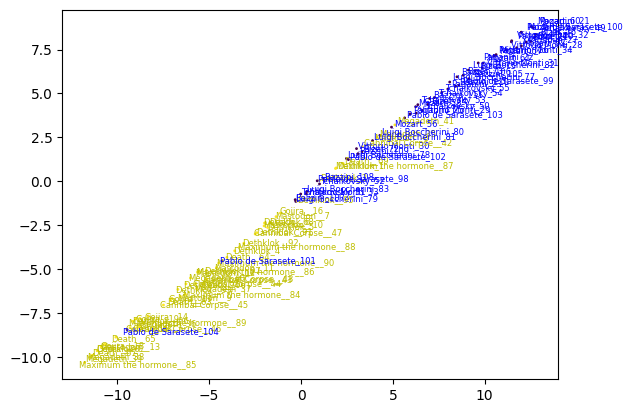

In [ ]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [ ]:
import joblib
#guardar modelo
os.mkdir('modelo')
filename_ = 'modelo/Clásica_vs_metal'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")

['modelo/Clásica_vs_metal.pkl']

In [ ]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

INGRESO DE NUEVO LINK

In [ ]:
link_= ["https://youtu.be/aSbq-oVUsvA"] #Se selecciona el link de youtube de la canciòn deseada
name_ = ["Inquisition"]                                      #Nombre de la banda/artista
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Inquisition
[youtube] Extracting URL: https://youtu.be/aSbq-oVUsvA
[youtube] aSbq-oVUsvA: Downloading webpage
[youtube] aSbq-oVUsvA: Downloading ios player API JSON
[youtube] aSbq-oVUsvA: Downloading web creator player API JSON
[youtube] aSbq-oVUsvA: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=aSbq-oVUsvA
[youtube] aSbq-oVUsvA: Downloading webpage
[youtube] aSbq-oVUsvA: Downloading ios player API JSON
[youtube] aSbq-oVUsvA: Downloading web creator player API JSON
[youtube] aSbq-oVUsvA: Downloading m3u8 information
[info] aSbq-oVUsvA: Downloading 1 format(s): 251
[download] Inquisition.mp3 has already been downloaded
[download] 100% of    5.52MiB
Download complete... Inquisition.mp3


Convertir mp3 a .wav

In [ ]:
!ffmpeg -y -i Inquisition.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import soundfile as sf # para instalar pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

# Cargar el archivo de audio
audio_signal, sampling_rate = sf.read(nombre_out)

# Verificar cuántos canales tiene el archivo
print(f"Forma del audio: {audio_signal.shape}")

# Si es estéreo (2 canales), lo convertimos en mono promediando los canales
if len(audio_signal.shape) > 1 and audio_signal.shape[1] == 2:
    audio_mono = np.mean(audio_signal, axis=1)
else:
    audio_mono = audio_signal  # Si ya es mono, no hacemos nada

# Guardar el archivo de audio en mono
sf.write('audio_mono.wav', audio_mono, sampling_rate)

audio_mono.shape


Frecuencia de muestreo 48000.00[Hz]
audio output.wav
Forma del audio: (18074227, 2)


(18074227,)

In [ ]:
xpro = audio_mono.copy() #copiar archivos para procesar
ti = 125 #tiempo incio a procesar seg
tf = 130 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs))]

In [ ]:
from IPython.display import Audio
ns = 180 #se reproducen los primeros ns segundos
Audio(xs[:int(fs*ns)].T,rate=fs)

Normalizar la señal

In [ ]:
 audio_mono = audio_mono / np.max(np.abs(audio_mono))
 xs= xs/np.max(np.abs(xs))

In [ ]:
# Simulación de modulación por amplitud (AM)
def am_modulate(audio_signal, carrier_freq, sampling_rate, mod_index):
    t = np.arange(len(audio_signal)) / sampling_rate
    carrier = np.sin(2 * np.pi * carrier_freq * t)
    am_signal = (1 + mod_index * audio_signal) * carrier
    return t, carrier, am_signal

In [ ]:
#Simulación de la modulación AM
carrier_freq = 120000  #Frecuencia de la portadora
mod_index = float(input("Ingrese el indice de modulacion:"))   # Índice de modulación
t, carrier, am_signal = am_modulate(audio_mono, carrier_freq, sampling_rate, mod_index)

Ingrese el indice de modulacion:0.8


Grafico de las señales:

In [ ]:
def plot_signal(time, signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.title(title)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

def plot_frequency(signal, fs, title):
    N = len(signal)
    yf = np.fft.rfft(signal)
    xf = np.fft.rfftfreq(N, 1 / fs)[:N // 2]
    plt.figure(figsize=(10, 4))
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
    plt.title(title)
    plt.grid()
    plt.show()

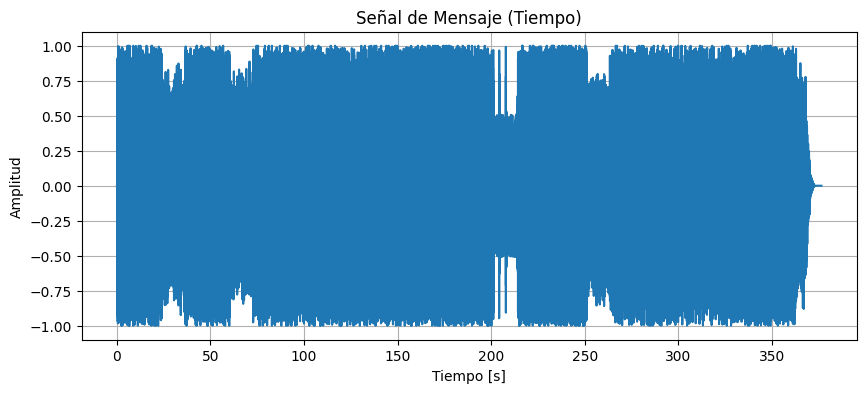

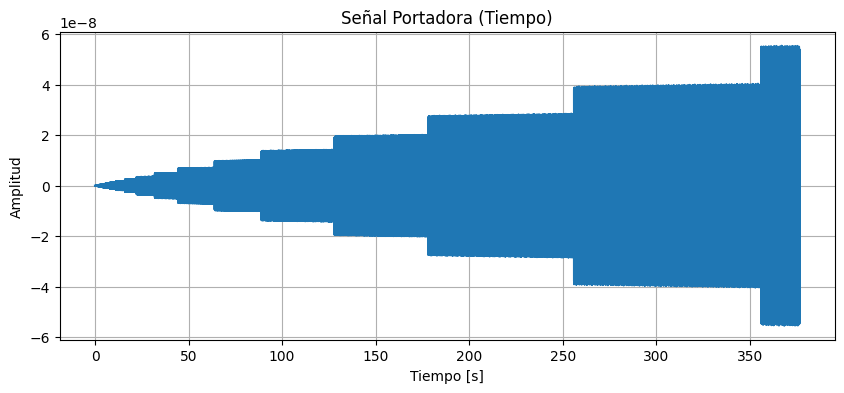

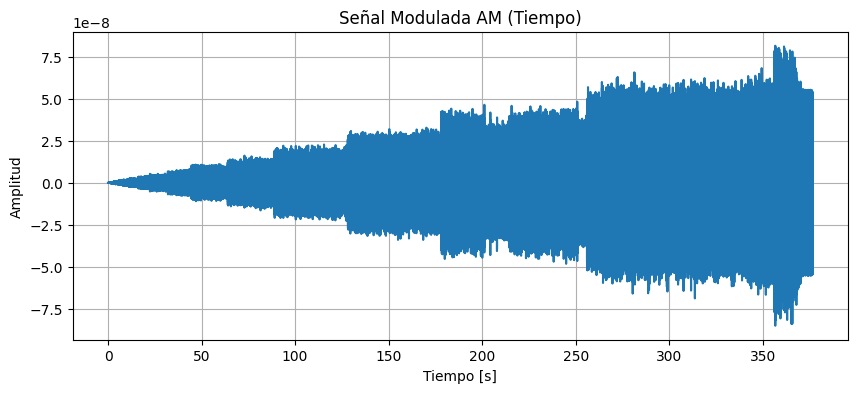

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
plot_signal(t, audio_mono, "Señal de Mensaje (Tiempo)")
plot_signal(t, carrier, "Señal Portadora (Tiempo)")
plot_signal(t, am_signal, "Señal Modulada AM (Tiempo)")

Cálculo de Fourier

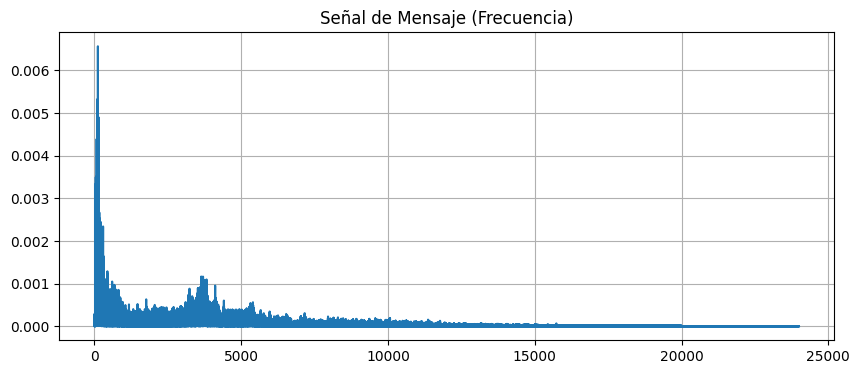

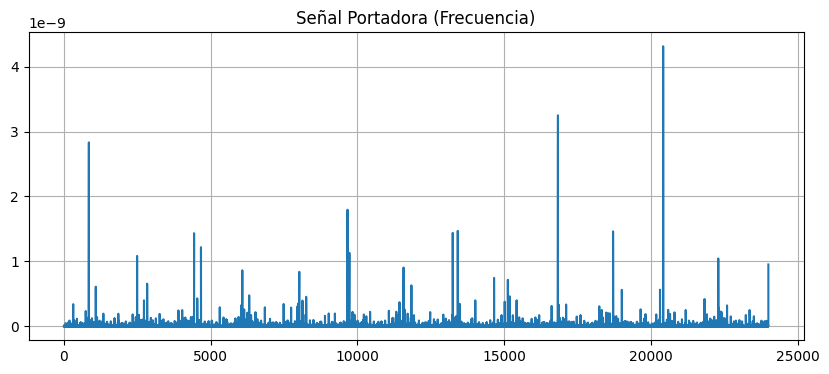

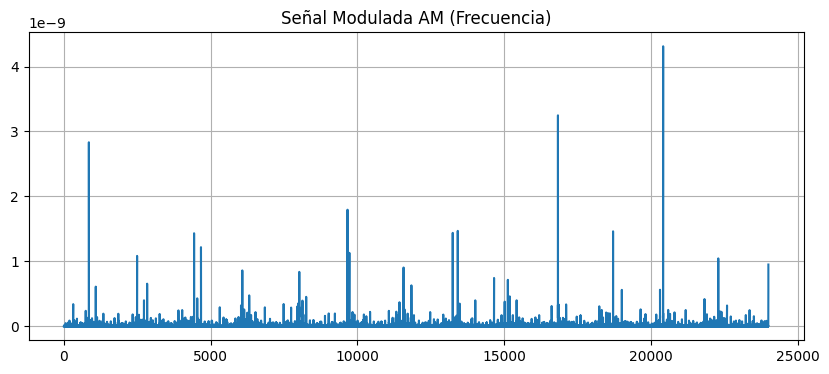

In [ ]:
#Transformada de Fourier para mostrar en frecuencia
plot_frequency(audio_mono, sampling_rate, 'Señal de Mensaje (Frecuencia)')
plot_frequency(carrier, sampling_rate, 'Señal Portadora (Frecuencia)')
plot_frequency(am_signal, sampling_rate, 'Señal Modulada AM (Frecuencia)')

In [ ]:
 #Reproducir los audios
 #Señal En Mono
Audio(xs, rate=fs )

In [ ]:
#Señal Portadora
xpro_1 = carrier.copy() #copiar archivos para procesar
ti = 125 #tiempo incio a procesar seg
tf = 130 #tiempo final a procesar seg
xs_1 = xpro_1[int(ti*fs):int((tf*fs))]
Audio(xs_1, rate=fs)

In [ ]:
#Señal Modulada
xpro_2= am_signal.copy() #copiar archivos para procesar
ti = 125 #tiempo incio a procesar seg
tf = 130 #tiempo final a procesar seg
xs_2 = xpro_2[int(ti*fs):int((tf*fs))]
Audio(xs_2, rate=fs)

#DEMODULACIÓN:

#MIXER:

2024-10-01 23:55:32.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 23:55:32.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 23:55:32.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


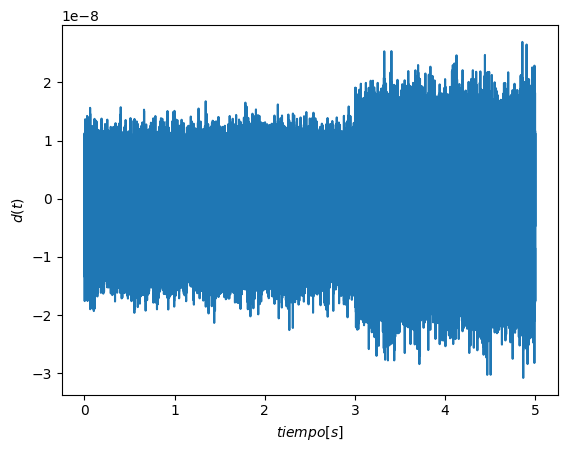

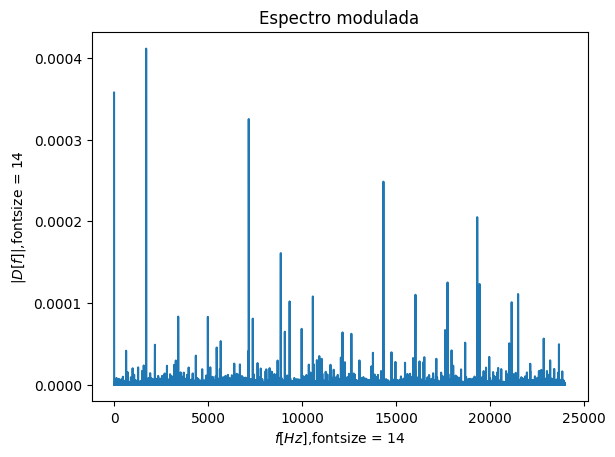

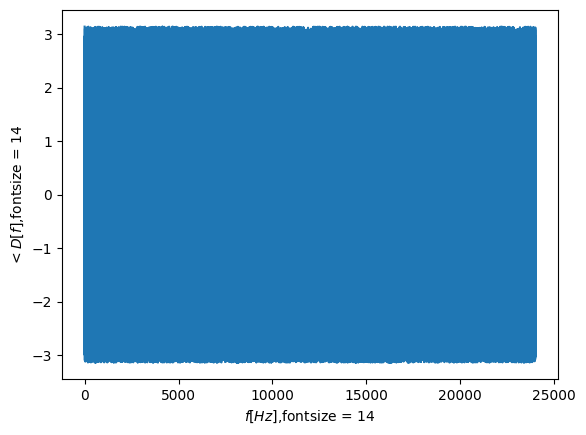

In [ ]:
#Codigo del Dashboard
import streamlit as st
import pandas as pd
import numpy as np
import os
import subprocess
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import yt_dlp as youtube_dl
import joblib
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t_m = np.arange(len(xs_2)) / fs

d = xs_2*np.cos(2*np.pi*carrier_freq*t_m)#señal demodulada
#repoducir señal demodulada
st.audio(d, sample_rate=fs)

plt.plot(t_m,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro

# Calculate the correct frequency vector
vf = np.fft.rfftfreq(len(d), 1/fs)

plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$,fontsize = 14')
plt.ylabel(r'$|D[f]|$,fontsize = 14')
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$,fontsize = 14')
plt.ylabel(r'$<D[f]$,fontsize = 14')
plt.show()


In [ ]:
t_m = np.arange(len(xs_2)) / fs

d = xs_2*np.cos(2*np.pi*carrier_freq*t_m)#señal demodulada
#repoducir señal demodulada
Audio(d,rate=fs)

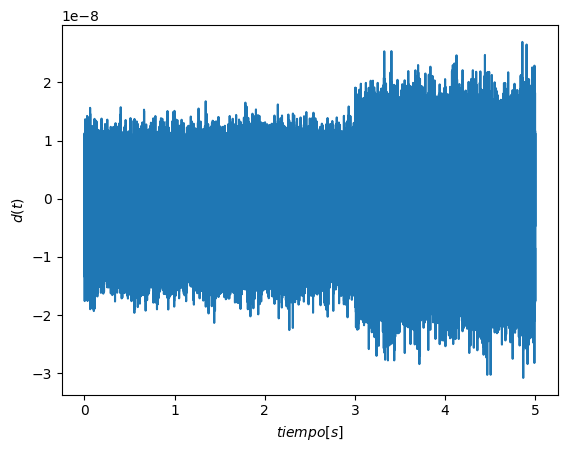

In [ ]:
plt.plot(t_m,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

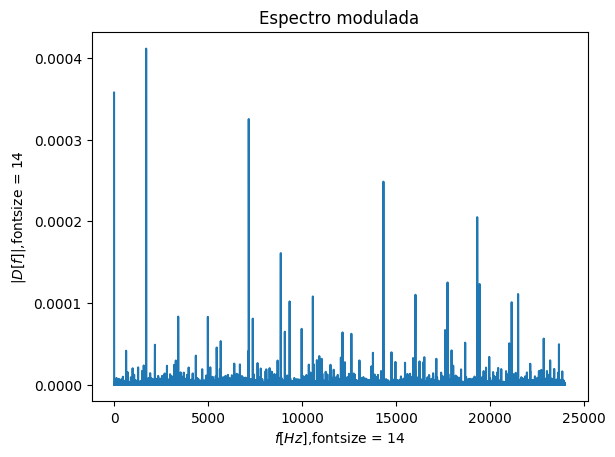

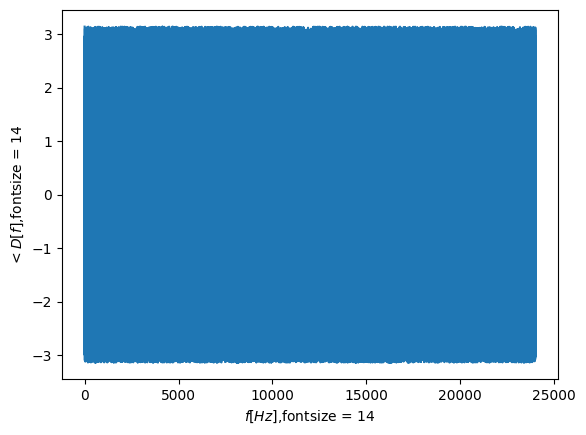

In [ ]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro

# Calculate the correct frequency vector
vf = np.fft.rfftfreq(len(d), 1/fs)

plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$,fontsize = 14')
plt.ylabel(r'$|D[f]|$,fontsize = 14')
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$,fontsize = 14')
plt.ylabel(r'$<D[f]$,fontsize = 14')
plt.show()

###Filtro Pasabajas

In [ ]:
from scipy.signal import butter, cheby1, cheby2, bessel, lfilter, freqz, freqz_zpk, filtfilt
import matplotlib.pyplot as plt
import numpy as n

In [ ]:
N = 10 #orden el filtro
Wn = 20000 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

In [ ]:
from matplotlib.patches import Circle
#gráfica polos y ceros
def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

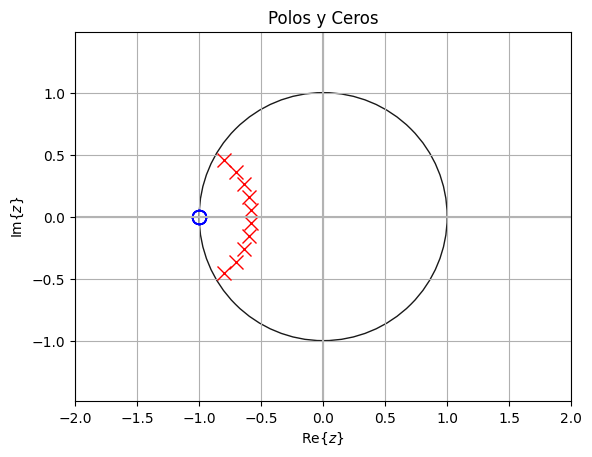

In [ ]:
show_zp(zeros, poles, title='Polos y Ceros')#gráfica polos y ceros

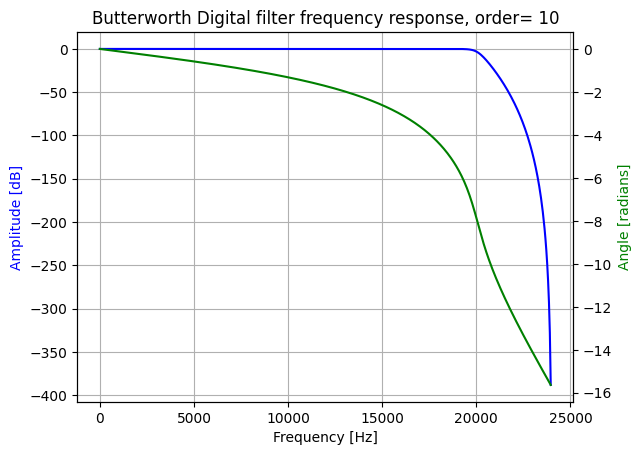

In [ ]:
plot_freq_response('Butterworth', w, h, N) #gráfica de bode del filtro

Aplicación del filtro a la canción

In [ ]:
out='ba'
num, den = butter(N, Wn, btype=filt, output=out, fs=fs)
xf = lfilter(num, den, d, axis=0)
Audio(xf,rate=fs) #Audio con ruido filtrado

###COMPARACIÓN

In [ ]:
from google.colab import files
import joblib

# Subir el archivo Clásica_vs_metal.pkl
uploaded = files.upload()

# Cargar el archivo usando joblib
data = joblib.load(next(iter(uploaded.keys())))

Saving Clásica_vs_metal.pkl to Clásica_vs_metal.pkl


In [ ]:
# Revisar las claves y partes del contenido
print(data.keys())

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])


In [ ]:
import os
import streamlit as st
import numpy as np
import gdown
import joblib
from google.colab import files
# Crear la carpeta "modelo" si no existe
if not os.path.exists('modelo'):
    os.makedirs('modelo')

# Ruta del modelo
modelo_path = 'modelo/Clásica_vs_metal.pkl'

# Cargar el modelo
loaded_model = joblib.load(modelo_path)

# Verificación del cargue del modelo
st.write("Modelo cargado con éxito.")
st.write(loaded_model.keys())

def normalizar_espectro(espectro):
    return espectro / np.linalg.norm(espectro)

def detectar_genero(audio_mono, modelo):
    #cargar variables del modelo
    Xw_ = modelo['Xw_']  #base de datos de espectros
    label = modelo['label']  #géneros de las canciones

    #calcular la rfft del nuevo registro (Xfn)
    Xfn = np.abs(np.fft.rfft(audio_mono))

    #verificar dimensiones
    print(f"Dimensiones de Xfn (nueva canción): {Xfn.shape}")
    print(f"Dimensiones de Xw_ (base de datos): {Xw_.shape}")

    #normalizar espectros
    Xfn_normalizado = normalizar_espectro(Xfn)

    # Calculate Xw_normalizado before the if statement
    Xw_normalizado = np.array([normalizar_espectro(x) for x in Xw_])

    if Xfn_normalizado.shape[0] > Xw_normalizado.shape[1]:
        Xfn_normalizado = Xfn_normalizado[:Xw_normalizado.shape[1]]
    else:
        Xfn_normalizado = np.pad(Xfn_normalizado, (0, Xw_normalizado.shape[1] - Xfn_normalizado.shape[0]), 'constant')
    Xfn_normalizado = Xfn_normalizado.reshape(1, -1)

    #calcular la distancia usando los espectros normalizados
    distancias = np.linalg.norm(Xw_normalizado - Xfn_normalizado, axis=1)

    # Mostrar distancias
    #print(f"Distancias calculadas: {distancias}")

    #encontrar el índice de la distancia mínima
    indice_minimo = np.argmin(distancias)

    #detectar el género correspondiente (1: Clásica, 2:Metal )
    genero_detectado = label[indice_minimo]
    cancion_parecida = modelo['name_c'][indice_minimo]

    return genero_detectado, cancion_parecida

#ejecutar la función de detección
genero, cancion_parecida = detectar_genero(audio_mono, data)

st.markdown("## Genero detectado de la canción demodulada y filtrada")

#mostrar el género detectado y la canción más parecida
if genero == 1:
    print(f"El género detectado es: Clásica, Canción más parecida: {cancion_parecida}")
elif genero == 2:
    print(f"El género detectado es: Metal, Canción más parecida: {cancion_parecida}")

2024-10-02 00:23:17.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:17.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:17.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:17.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:17.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:17.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:28.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 00:23:28.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Dimensiones de Xfn (nueva canción): (9037114,)
Dimensiones de Xw_ (base de datos): (1, 112)
El género detectado es: Metal, Canción más parecida: Dethklok_9
